In [ ]:
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
import os
import shutil

# Path direktori data
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Fungsi untuk membersihkan isi direktori
def clean_directory(path):
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"Direktori lama dihapus: {path}")
    os.makedirs(path)
    print(f"Direktori baru dibuat: {path}")

# Bersihkan dan buat ulang direktori
for d in [train_dir, val_dir, test_dir]:
    clean_directory(d)

Direktori baru dibuat: /content/data/train
Direktori baru dibuat: /content/data/val
Direktori baru dibuat: /content/data/test


In [ ]:
# Ekstrak file ZIP
zip_path = '/content/data.zip'
extract_path = '/content/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("File berhasil diekstrak ke:", extract_path)

File berhasil diekstrak ke: /content/data


In [ ]:
# Siapkan folder train dan val
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'


os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

Jumlah gambar per kelas (Train):
  class_I: 24
  class_D: 24
  class_1: 24
  class_R: 24
  class_W: 24
  class_J: 24
  class_4: 24
  class_A: 24
  class_Z: 24
  class_E: 24
  class_T: 24
  class_K: 24
  class_V: 24
  class_O: 24
  class_G: 24
  class_8: 24
  class_X: 24
  class_U: 24
  class_0: 24
  class_B: 24
  class_5: 24
  class_S: 24
  class_C: 24
  class_6: 24
  class_2: 24
  class_3: 24
  class_L: 24
  class_N: 24
  class_H: 24
  class_9: 24
  class_P: 24
  class_Y: 24
  class_F: 24
  class_M: 24
  class_7: 24
  class_Q: 24

Jumlah gambar per kelas (Val):
  class_I: 6
  class_D: 6
  class_1: 6
  class_R: 6
  class_W: 6
  class_J: 6
  class_4: 6
  class_A: 6
  class_Z: 6
  class_E: 6
  class_T: 6
  class_K: 6
  class_V: 6
  class_O: 6
  class_G: 6
  class_8: 6
  class_X: 6
  class_U: 6
  class_0: 6
  class_B: 6
  class_5: 6
  class_S: 6
  class_C: 6
  class_6: 6
  class_2: 6
  class_3: 6
  class_L: 6
  class_N: 6
  class_H: 6
  class_9: 6
  class_P: 6
  class_Y: 6
  class_F: 6
  

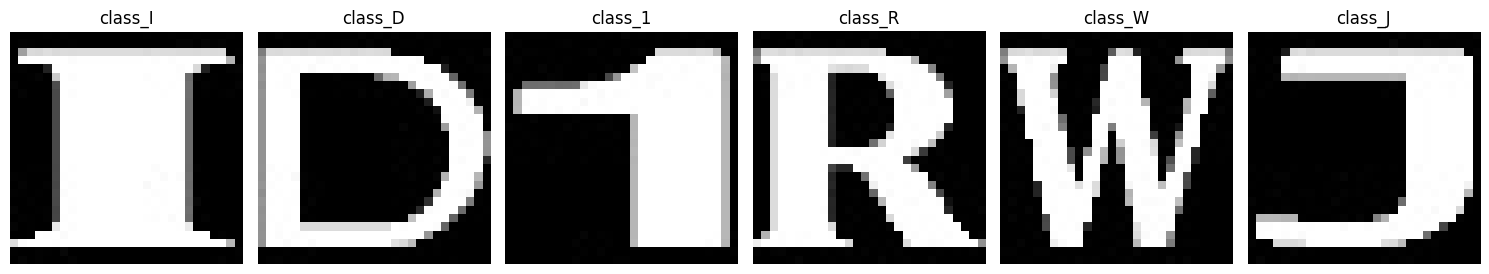

In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def count_images(directory):
    count_per_class = {}
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            count = len(os.listdir(cls_path))
            count_per_class[cls] = count
    return count_per_class

# Hitung jumlah gambar per kelas
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

# Tampilkan hasil
print("Jumlah gambar per kelas (Train):")
for cls, count in train_counts.items():
    print(f"  {cls}: {count}")

print("\nJumlah gambar per kelas (Val):")
for cls, count in val_counts.items():
    print(f"  {cls}: {count}")

print("\nJumlah gambar per kelas (Test):")
for cls, count in test_counts.items():
    print(f"  {cls}: {count}")

# Menampilkan beberapa gambar contoh dari train set
def show_sample_images(directory, num_images=6):
    all_classes = os.listdir(directory)
    all_images = []

    # Ambil gambar acak dari berbagai kelas
    for cls in all_classes:
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            images = os.listdir(cls_path)
            if images:
                selected = random.choice(images)
                image_path = os.path.join(cls_path, selected)
                all_images.append((image_path, cls))

        if len(all_images) >= num_images:
            break

    # Tampilkan gambar
    plt.figure(figsize=(15, 5))
    for i, (img_path, cls) in enumerate(all_images):
        img = Image.open(img_path)
        plt.subplot(1, len(all_images), i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Tampilkan contoh gambar dari train_dir
show_sample_images(train_dir)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.metrics import classification_report

In [ ]:
# Data generator dan augmentasi
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Rescale
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

datagen_val_test = ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=16,
    shuffle=True
)

val_generator = datagen_val_test.flow_from_directory(
    val_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

# Setup data test generator
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    '/content/data/test',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(36, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,388 (657.77 KB)

 Trainable params: 168,388 (657.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Pelatihan Model
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = model.fit(
    train_generator,
    epochs=75,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.0744 - loss: 3.5269 - val_accuracy: 0.3241 - val_loss: 2.4220 - learning_rate: 0.0010
Epoch 2/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3069 - loss: 2.3827 - val_accuracy: 0.7315 - val_loss: 0.8114 - learning_rate: 0.0010
Epoch 3/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5439 - loss: 1.5422 - val_accuracy: 0.8333 - val_loss: 0.5362 - learning_rate: 0.0010
Epoch 4/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6455 - loss: 1.0740 - val_accuracy: 0.8380 - val_loss: 0.5422 - learning_rate: 0.0010
Epoch 5/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6924 - loss: 0.8390 - val_accuracy: 0.8056 - val_loss: 0.4834 - learning_rate: 0.0010
Epoch 6/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7531 - loss: 0.7635 - val_accuracy: 0.8519 - val_loss: 0.4276 - learning_rate: 0.0010
Epoch 7/75
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8135 - loss: 0.5588 - val_accuracy: 0.87

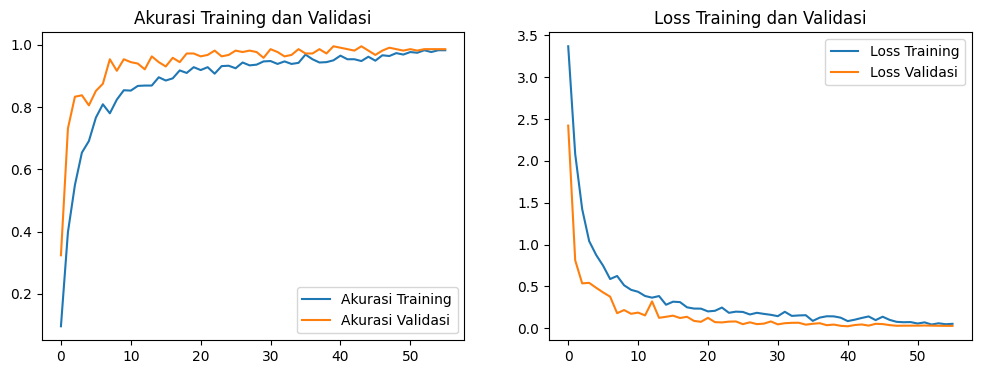

In [ ]:
# Plot Hasil Pelatihan
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Training')
plt.plot(epochs_range, val_acc, label='Akurasi Validasi')
plt.legend(loc='lower right')
plt.title('Akurasi Training dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Training')
plt.plot(epochs_range, val_loss, label='Loss Validasi')
plt.legend(loc='upper right')
plt.title('Loss Training dan Validasi')
plt.show()

In [ ]:
# Evaluasi Model pada Data Tes
print("\nEvaluasi pada data tes:")
loss_test, accuracy_test = model.evaluate(test_generator)
print(f"Test Loss: {loss_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")


Evaluasi pada data tes:
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9803 - loss: 3.8118
Test Loss: 4.8778
Test Accuracy: 0.9722


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:
              precision    recall  f1-score   support

     class_0       0.67      1.00      0.80         6
     class_1       1.00      1.00      1.00         6
     class_2       1.00      1.00      1.00         6
     class_3       1.00      1.00      1.00         6
     class_4       1.00      1.00      1.00         6
     class_5       1.00      1.00      1.00         6
     class_6       1.00      1.00      1.00         6
     class_7       1.00      1.00      1.00         6
     class_8       1.00      1.00      1.00         6
     class_9       1.00      1.00      1.00         6
     class_A       1.00      1.00      1.00         6
     class_B       1.00      1.00      1.00         6
     class_C       1.00      0.67      0.80         6
     class_D       1.00      1.00      1.00         6
     class_E       1.00      1.00      1.00         6
     class_F       1.00      1.00      1.00         6
     class_G     

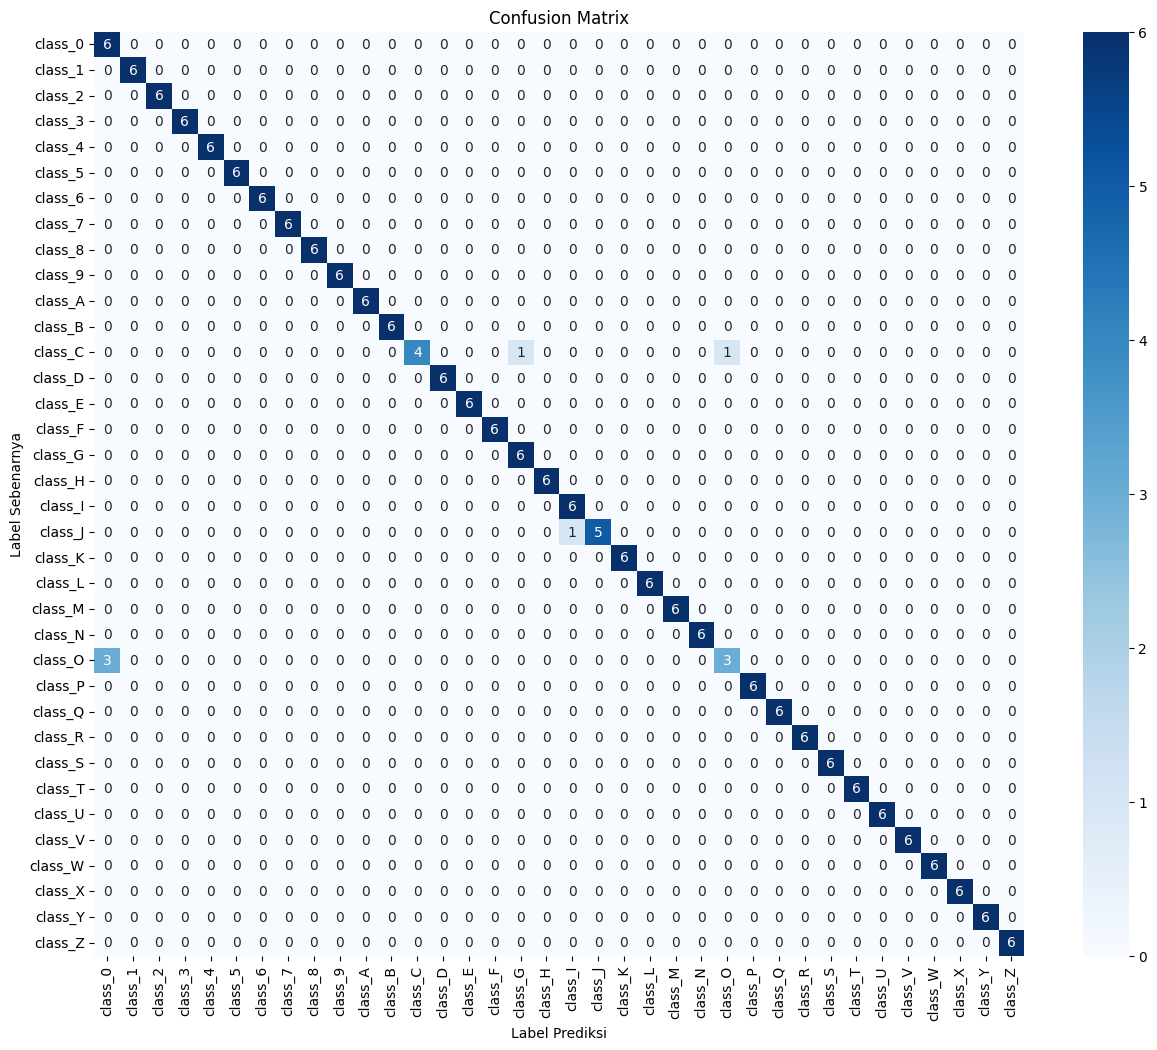

In [ ]:
# Classification Report dan Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

test_generator.reset()
y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels, zero_division=0))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(15,12)) # Ukuran disesuaikan untuk 36 kelas
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


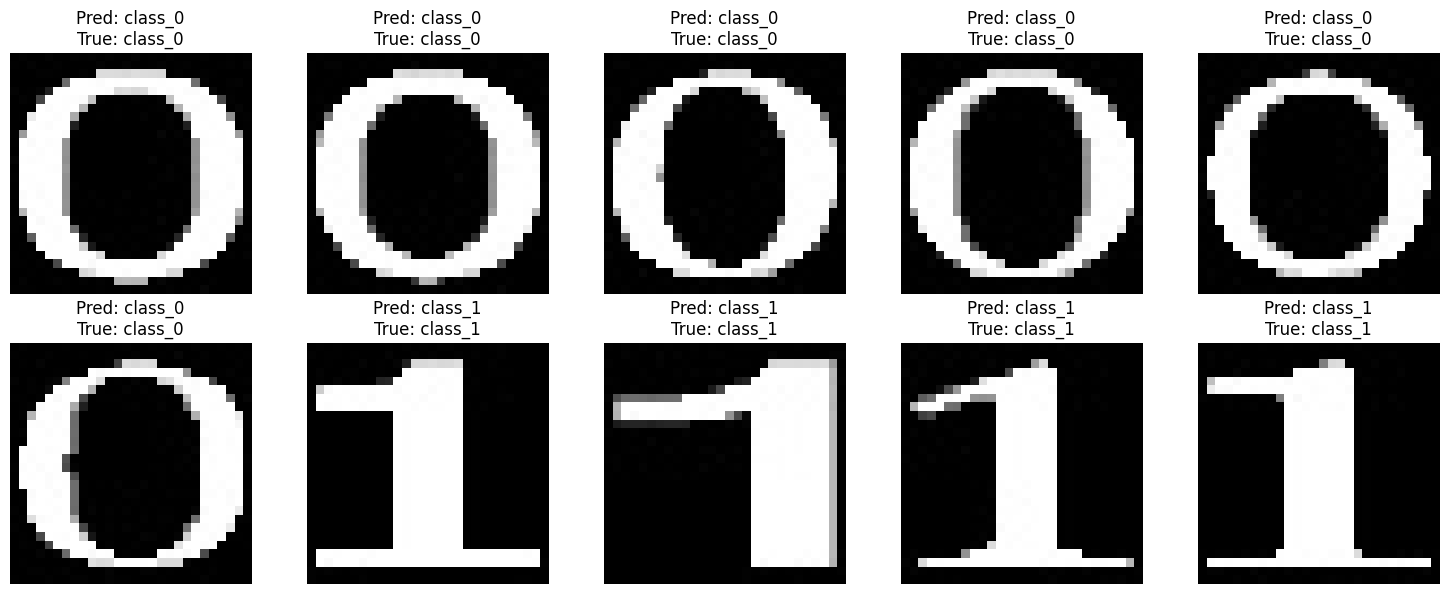

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil batch pertama dari test_generator
x_test, y_test = next(test_generator)

# Prediksi dengan model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Ambil mapping index ke label (misalnya 0 → A, 1 → B, dll.)
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Reverse map untuk decoding
rev_label_map = {v: k for k, v in test_generator.class_indices.items()}

# Tampilkan 10 gambar beserta prediksi
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {rev_label_map[y_pred_labels[i]]}\nTrue: {rev_label_map[y_true_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Simpan model ke file HDF5 (.h5)
model.save('/content/model_karakter_cnn.h5')
print("Model berhasil disimpan sebagai 'model_karakter.h5'")

Model berhasil disimpan sebagai 'model_karakter.h5'


# Prediksi karakter baru

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model tersimpan
model = load_model('/content/model_karakter_cnn.h5')

# Label kelas: 0-9 dan A-Z
class_labels = [str(i) for i in range(10)] + [chr(c) for c in range(ord('A'), ord('Z')+1)]

# Preprocess gambar
def preprocess_single_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

Input citra uji

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Karakter yang diprediksi: Z


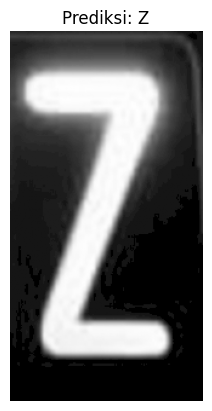

In [ ]:
# Path ke gambar uji
test_image_path = '/content/Z.PNG'  # Ubah ke path yang sesuai

# Prediksi
input_image = preprocess_single_image(test_image_path)
prediction = model.predict(input_image)
predicted_label = class_labels[np.argmax(prediction)]

# Tampilkan hasil
print(f'Karakter yang diprediksi: {predicted_label}')
plt.imshow(cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()